In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.2
3.2.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 1, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 1, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 1, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 1, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 1, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 1, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 1, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 1, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 1, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 1, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x00000279426C8180>)
ScalarOutcome('Total Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x00000279426C8180>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x00000279426C8180>)


In [9]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=3500, policies=75)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 3500 scenarios * 75 policies * 1 model(s) = 262500 experiments
100%|████████████████████████████████| 262500/262500 [2:48:38<00:00, 25.94it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [10]:
experiments, outcomes = results
print(outcomes.keys())
experiments 

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,117,226.131834,1.5,0.598854,317.221743,10.0,0.648338,141.841965,1.0,0.081389,...,8,7,0,6,10,3,1,75,0,dikesnet
1,43,172.406397,10.0,0.023889,109.398510,10.0,0.648768,316.599739,1.0,0.439403,...,8,7,0,6,10,3,1,76,0,dikesnet
2,98,268.451433,1.0,0.277244,79.415990,1.0,0.928759,209.875045,10.0,0.281660,...,8,7,0,6,10,3,1,77,0,dikesnet
3,116,123.441335,1.5,0.396670,64.416308,1.0,0.464667,50.325526,1.5,0.601217,...,8,7,0,6,10,3,1,78,0,dikesnet
4,85,306.181737,1.5,0.602673,125.594369,10.0,0.937588,116.398224,1.5,0.374126,...,8,7,0,6,10,3,1,79,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262495,67,130.709943,1.0,0.963984,314.385814,10.0,0.436333,232.236563,1.0,0.405264,...,1,4,4,7,3,5,3,3570,74,dikesnet
262496,115,304.749153,1.5,0.424812,81.169845,1.5,0.441470,120.252503,1.0,0.902491,...,1,4,4,7,3,5,3,3571,74,dikesnet
262497,66,310.634147,1.5,0.163516,37.720457,1.0,0.646705,251.030344,1.5,0.310777,...,1,4,4,7,3,5,3,3572,74,dikesnet
262498,123,117.992439,1.0,0.881180,174.148322,1.5,0.239412,265.636066,1.5,0.180903,...,1,4,4,7,3,5,3,3573,74,dikesnet


In [14]:
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
data = outcomes['Expected Annual Damage']
y = data < np.percentile(data, 60)

In [15]:
from ema_workbench.analysis import prim

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 262500 points remaining, containing 157499 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.14909714285714284, coverage: 0.24849681585279906, density: 1.0 restricted_dimensions: 5


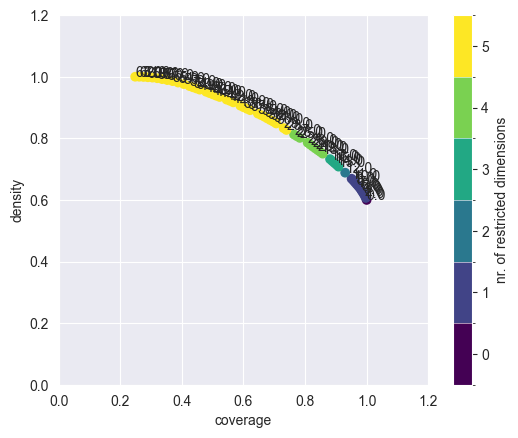

In [16]:
box1.show_tradeoff(annotated=True)
plt.show()

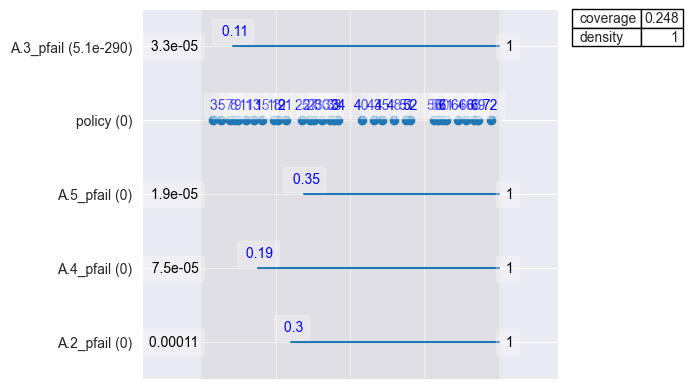

In [17]:
box1.inspect(style='graph')
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\svenk\AppData\Local\Programs\Python\Python312\Lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


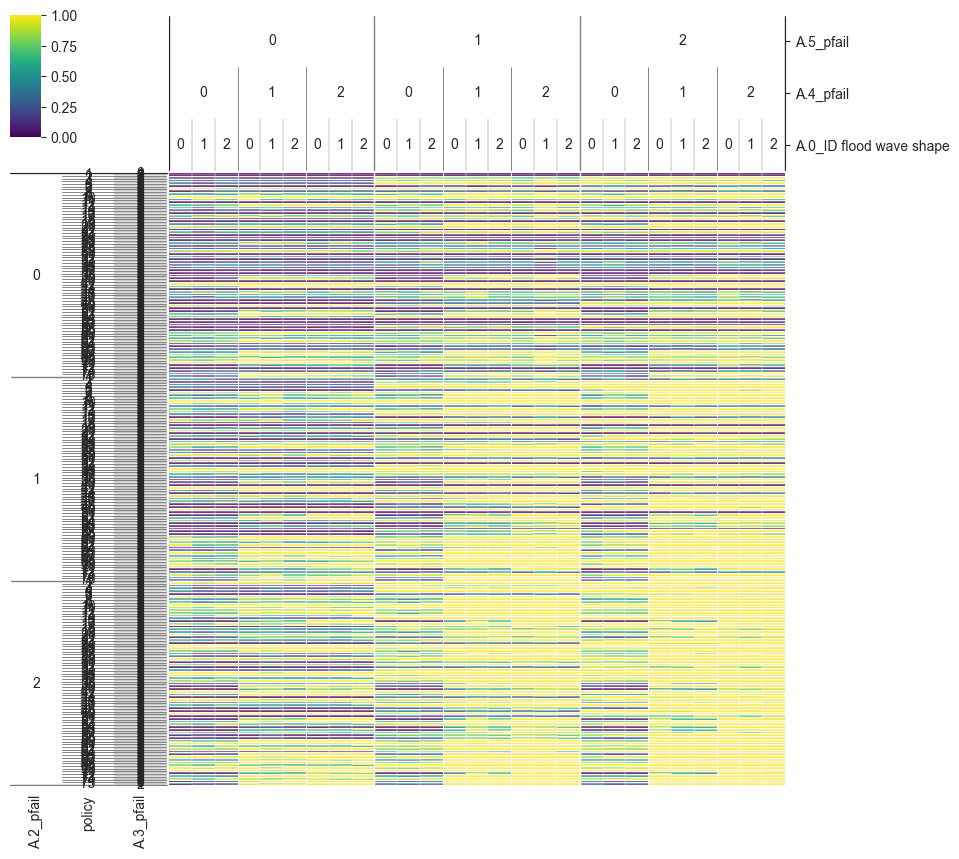

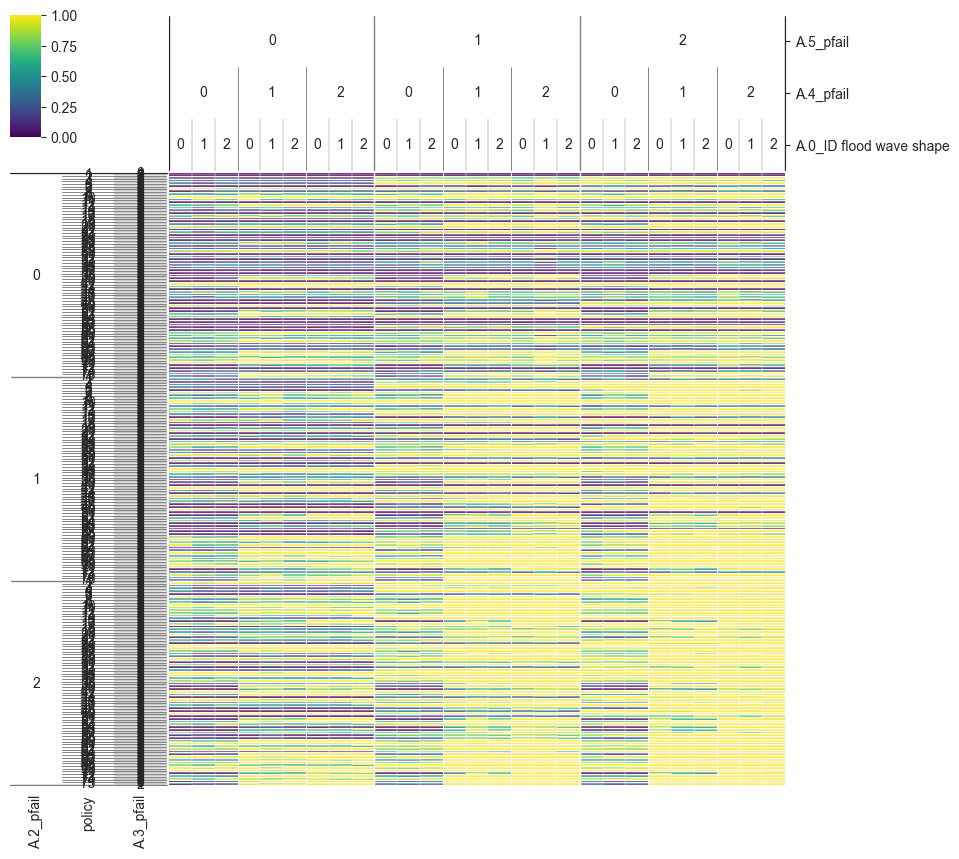

In [18]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\svenk\AppData\Local\Programs\Python\Python312\Lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


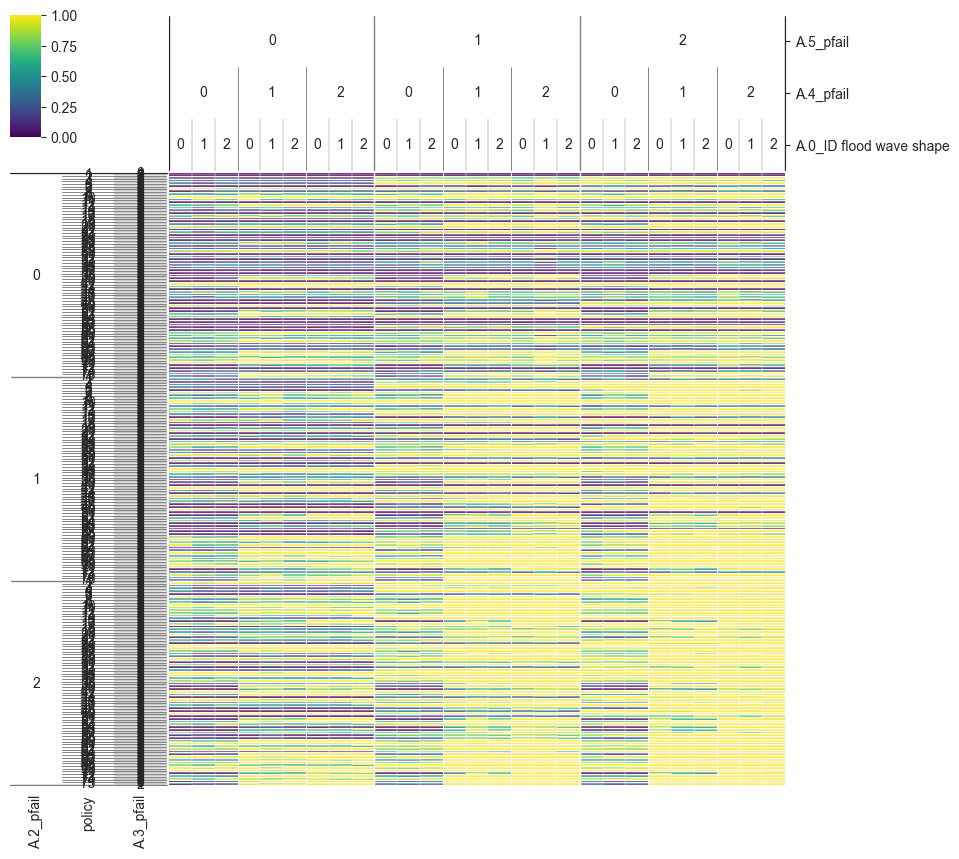

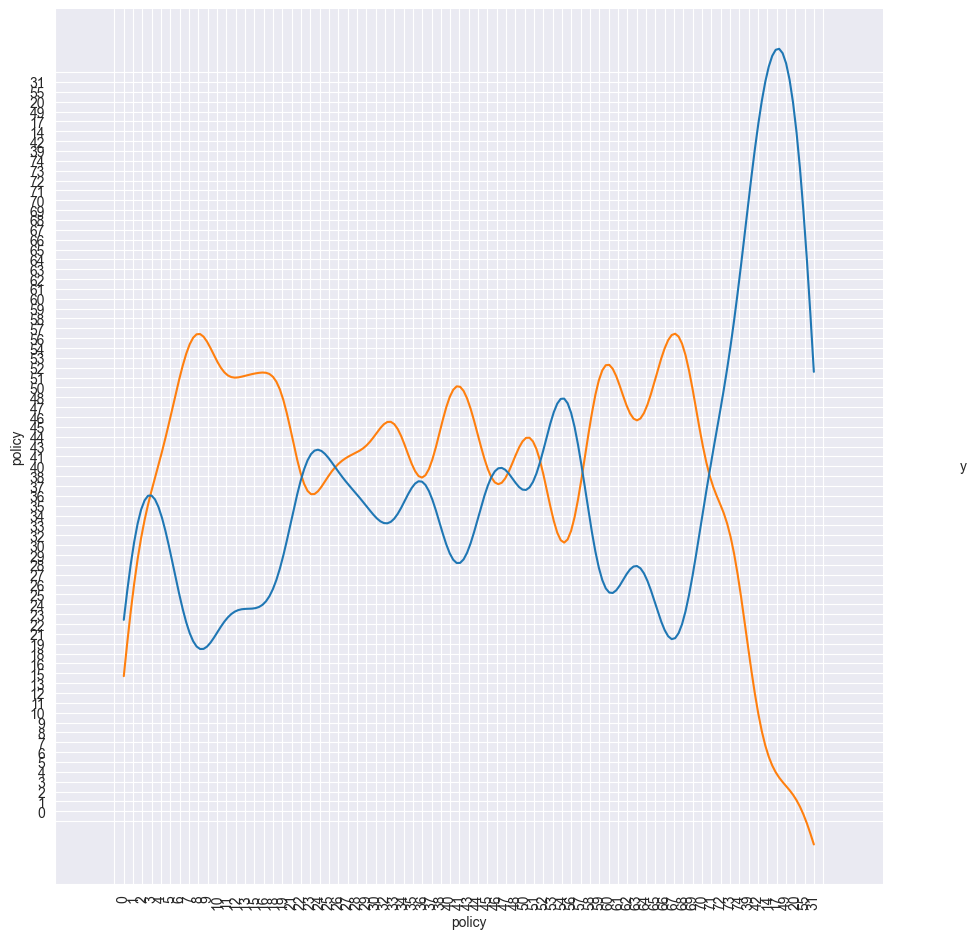

In [19]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
box1.select(8)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy)

from ema_workbench import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol

In [21]:
outcomes['Expected Annual Damage'].shape

(262500,)

In [22]:
import statsmodels.api as sm

X = pd.DataFrame(experiments).drop(['model','policy'], inplace=False, axis=1)
X_0 = sm.add_constant(X)

est = sm.OLS(outcomes['Expected Annual Damage'], X_0.astype(float)).fit()
print(est.summary())
print(est.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     551.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:23:47   Log-Likelihood:            -5.0227e+06
No. Observations:              262500   AIC:                         1.005e+07
Df Residuals:                  262463   BIC:                         1.005e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
A.0_ID flood wave shape  6

In [ ]:
problem = get_SALib_problem(uncertainties)

In [ ]:
problem

In [ ]:
n_exp = 1000
experiments_sobol, outcomes_sobol = perform_experiments(dike_model, scenarios=n_exp,
                                                        uncertainty_sampling=Samplers.SOBOL)

In [ ]:
prey_final_sobol = outcomes['Expected Annual Damage']
prey_mean_sobol = np.mean(outcomes['Expected Annual Damage'])
prey_std_sobol = np.std(outcomes['Expected Annual Damage'])

Si = sobol.analyze(problem, prey_mean_sobol, calc_second_order=True, print_to_console=True)

In [ ]:
prey_final_sobol

In [ ]:
print(problem)

In [ ]:
experiments.shape

In [ ]:
outcomes['Expected Annual Damage'].shape

In [23]:
experiments_df = pd.DataFrame(experiments)
outcomes_df = pd.DataFrame(outcomes)

# Combine experiments and outcomes into a single DataFrame
combined_df = pd.concat([experiments_df, outcomes_df], axis=1)

# Focus on the relevant lever and outcomes
lever_name = 'A.2_DikeIncrease 0'
outcome_names = ['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths']

# Aggregate outcomes by the lever values
aggregated_results = combined_df.groupby(lever_name)[outcome_names].mean().reset_index()

# Display the aggregated results
print(aggregated_results)

# Identify the lever value that minimizes the outcomes
optimal_value = aggregated_results[outcome_names].sum(axis=1).idxmin()
optimal_lever_height = aggregated_results.iloc[optimal_value][lever_name]

print(f'The ideal height of the lever {lever_name} is {optimal_lever_height} for minimizing the outcomes.')

    A.2_DikeIncrease 0  Expected Annual Damage  Total Investment Costs  \
0                    0            2.847212e+07            2.747519e+09   
1                    1            2.261070e+07            2.764889e+09   
2                    2            1.589149e+07            2.792842e+09   
3                    3            1.389954e+07            2.756621e+09   
4                    4            6.883056e+06            2.830895e+09   
5                    5            9.663860e+06            2.816942e+09   
6                    6            9.502385e+06            2.873090e+09   
7                    7            1.292226e+06            2.832673e+09   
8                    8            4.260197e+06            2.883277e+09   
9                    9            3.887795e+06            2.803627e+09   
10                  10            5.056426e+06            2.882736e+09   

    Expected Number of Deaths  
0                    0.004958  
1                    0.004818  
2              

In [24]:
aggregated_results

,A.2_DikeIncrease 0,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,0,2.847212e+07,2.747519e+09,0.004958
1,1,2.261070e+07,2.764889e+09,0.004818
2,2,1.589149e+07,2.792842e+09,0.008605
3,3,1.389954e+07,2.756621e+09,0.005287
4,4,6.883056e+06,2.830895e+09,0.002618
5,5,9.663860e+06,2.816942e+09,0.002208
6,6,9.502385e+06,2.873090e+09,0.003031
7,7,1.292226e+06,2.832673e+09,0.000554
8,8,4.260197e+06,2.883277e+09,0.002052
9,9,3.887795e+06,2.803627e+09,0.000567


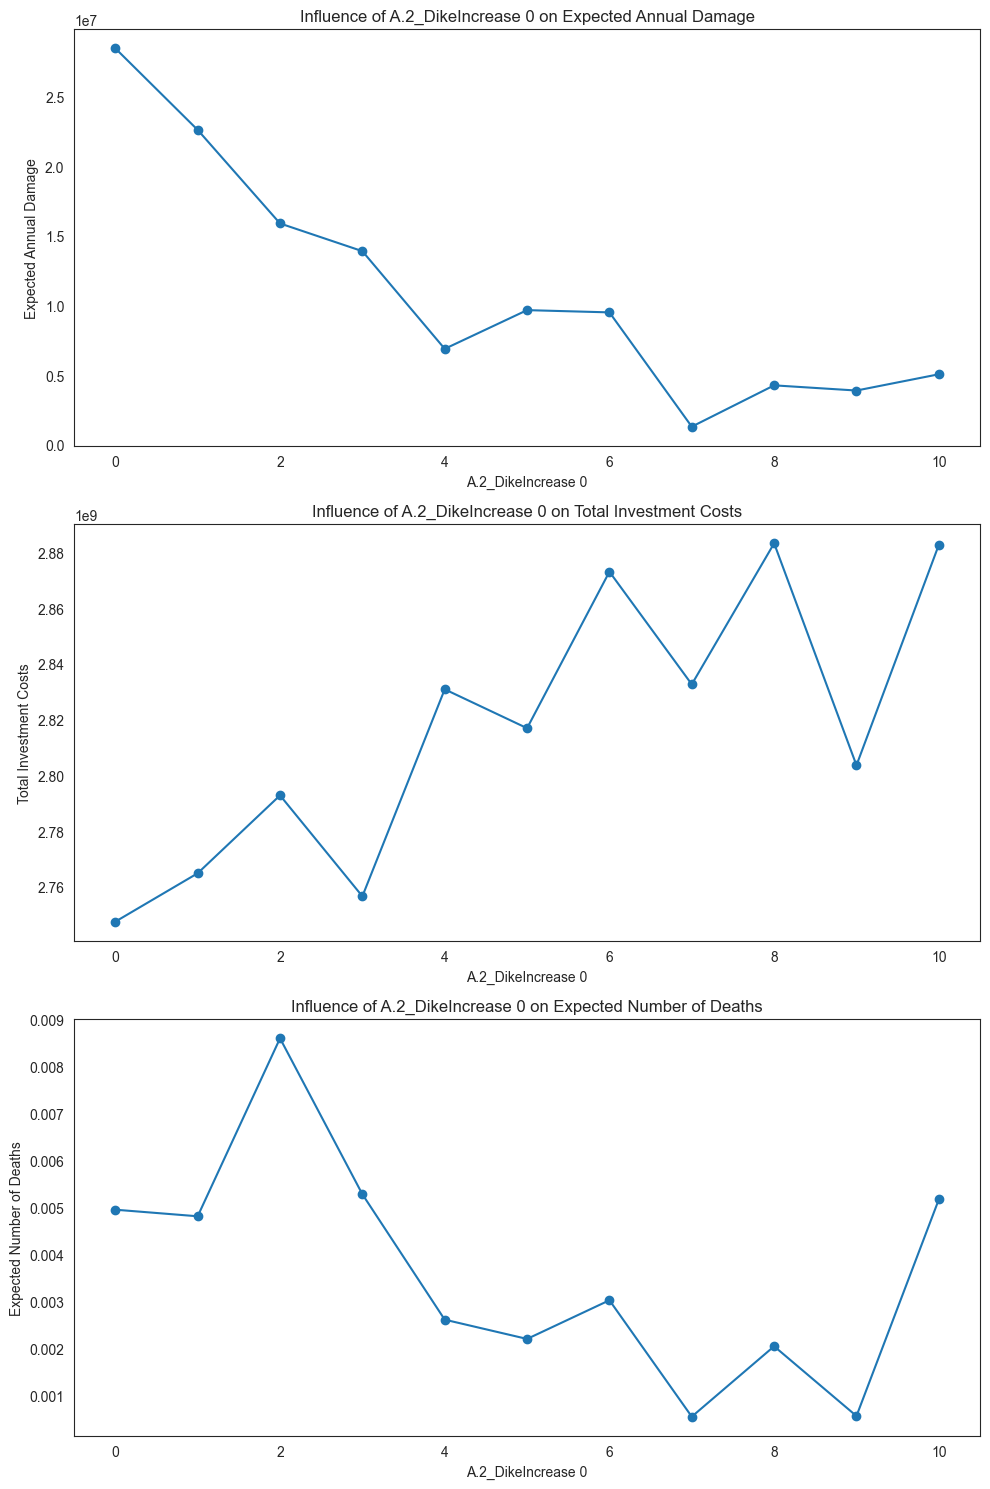

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `experiments` and `outcomes` are DataFrames obtained from the EMA Workbench results
experiments, outcomes = results

# Convert experiments and outcomes to DataFrames for easier manipulation
experiments_df = pd.DataFrame(experiments)
outcomes_df = pd.DataFrame(outcomes)

# Combine experiments and outcomes into a single DataFrame
combined_df = pd.concat([experiments_df, outcomes_df], axis=1)

# Focus on the relevant lever and outcomes
lever_name = 'A.2_DikeIncrease 0'
outcome_names = ['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths']

# Group by the lever values and calculate mean of outcomes
grouped_df = combined_df.groupby(lever_name)[outcome_names].mean().reset_index()

# Plot the results
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, outcome in enumerate(outcome_names):
    axes[i].plot(grouped_df[lever_name], grouped_df[outcome], marker='o')
    axes[i].set_title(f'Influence of {lever_name} on {outcome}')
    axes[i].set_xlabel(lever_name)
    axes[i].set_ylabel(outcome)

plt.tight_layout()
plt.show()